<div align="center">
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=350>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=350>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png">
    </picture>
    </a>
    <br>
    <br>
    <a href="https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/JOIN US ON SLACK-4A154B?style=for-the-badge&logo=slack&logoColor=white" alt="Logo">
    </a>
    <a href="https://visual-layer.readme.io/discuss" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/DISCUSSION%20FORUM-slateblue?style=for-the-badge&logo=discourse&logoWidth=20" alt="Logo">
    </a>
    <a href="https://www.linkedin.com/company/visual-layer/" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" alt="Logo">
    </a>
    <a href="https://twitter.com/visual_layer" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white" alt="Logo">
    </a>
    <a href="https://www.youtube.com/@visual-layer" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/-YouTube-black.svg?style=for-the-badge&logo=youtube&colorB=red" alt="Logo">
    </a>
</div>

# Analyze Tensorflow Datasets

[![Open in Colab](https://img.shields.io/badge/Open%20in%20Colab-blue?style=for-the-badge&logo=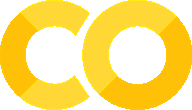&labelColor=gray)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/analyzing-tensorflow-datasets.ipynb)
[![Kaggle](https://img.shields.io/badge/Open%20in%20Kaggle-blue?style=for-the-badge&logo=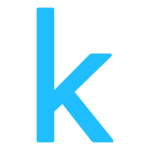&labelColor=gray)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/analyzing-tensorflow-datasets.ipynb)
[![Explore the Docs](https://img.shields.io/badge/Explore%20the%20Docs-blue?style=for-the-badge&labelColor=gray&logo=read-the-docs)](https://visual-layer.readme.io/docs/analyzing-tensorflow-datasets)

This notebook shows how you can analyze [Tensorflow Datasets](https://www.tensorflow.org/datasets) for issues using fastdup.

## Installation

First, let's install the necessary packages.

In [ ]:
!pip install -Uq fastdup tensorflow-datasets protobuf==3.20.0

Now, test the installation. If there's no error message, we are ready to go.

In [1]:
import fastdup
fastdup.__version__

'1.43'

## Download Dataset

For this demo, we will use the cats and dogs image classification dataset.

In [2]:
import tensorflow_datasets as tfds

ds, info = tfds.load('cats_vs_dogs', split='train', with_info=True, as_supervised=True)

2023-09-26 15:53:44.231996: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-26 15:53:44.233269: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 15:53:44.259349: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 15:53:44.259816: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 15:53:44.691120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

View the top 5 examples from the dataset.

image  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
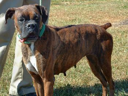
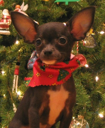
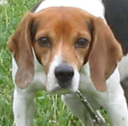
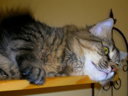
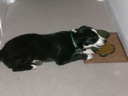

In [3]:
tfds.as_dataframe(ds.take(5), info)

## Convert Dataset to Images
The downloaded dataset are in binary format. Let's convert them into images and save the in our local directory.

The resulting directory should look like this

```
images/
    ├── cat
    |    ├── 0001.jpg
    |    └── 0002.jpg
    └── dog
         ├── 0001.jpg
         └── 0002.jpg
```

In [4]:
import os
from PIL import Image
import numpy as np
from tqdm.auto import tqdm

# Create a mapping from integer labels to string names
label_names = info.features['label'].names

# Create folder to store the images
root_dir = 'images'
os.makedirs(root_dir, exist_ok=True)

# Get the total number of samples in the dataset
n_samples = info.splits['train'].num_examples

# Iterate through the dataset to save images
for i, (image, label) in enumerate(tqdm(tfds.as_numpy(ds), total=n_samples, desc="Processing", unit=" samples")):
    # Convert integer label to string name
    label_name = label_names[label]
    
    # Create class directory if it doesn't exist
    class_dir = os.path.join(root_dir, label_name)
    os.makedirs(class_dir, exist_ok=True)
    
    # Define image path and save image
    image_path = os.path.join(class_dir, f'image_{i}.jpg')
    img = Image.fromarray(np.squeeze(image))
    img.save(image_path)


Processing:   0%|          | 0/23262 [00:00<?, ? samples/s]

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


## Construct Annotation DataFrame
fastdup expects the annotations of the dataset to be in a certain dataframe format.

In [5]:
import pandas as pd

# Get a list of file paths for all JPEG files in the directory and its subdirectories
file_paths = []
labels = []
for root, dirs, files in os.walk('images'):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg')):
            file_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Create a pandas dataframe from the list of file paths and labels
df = pd.DataFrame({'filename': file_paths, 'label': labels, 'split': 'train'})

# Print the resulting dataframe
df

filename label  split
0       images/cat/image_2932.jpg   cat  train
1       images/cat/image_2246.jpg   cat  train
2        images/cat/image_288.jpg   cat  train
3       images/cat/image_4274.jpg   cat  train
4      images/cat/image_21341.jpg   cat  train
...                           ...   ...    ...
23257   images/dog/image_5123.jpg   dog  train
23258  images/dog/image_16609.jpg   dog  train
23259  images/dog/image_15903.jpg   dog  train
23260  images/dog/image_22141.jpg   dog  train
23261   images/dog/image_1780.jpg   dog  train

[23262 rows x 3 columns]

## Run fastdup
One the dataset download completes, analyze the image folder where the dataset is stored.

In [6]:
fd = fastdup.create(input_dir='images')
fd.run(annotations=df)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.


                                                                               
   ad88                                          88                            
  d8"                             ,d             88                            
  88                              88             88                            
MM88MMM  ,adPPYYba,  ,adPPYba,  MM88MMM  ,adPPYb,88  88       88  8b,dPPYba,   
  88     ""     `Y8  I8[    ""    88    a8"    `Y88  88       88  88P'    "8a  
  88     ,adPPPPP88   `"Y8ba,     88    8b       88  88       88  88       d8  
  88     88,    ,88  aa    ]8I    88,   "8a,   ,d88  "8a,   ,a88  88b,   ,a8"  
  88     `"8bbdP"Y8  `"YbbdP"'    "Y888  `"8bbdP"Y8   `"YbbdP'Y8  88`YbbdP"'   
                                                                  88           
                                                                  88           


2023-09-26 15:54:05 [INFO] Going to loop 

0

## View Galleries

You can use all of fastdup gallery methods to view duplicates, clusters, etc.

```python
fd.vis.duplicates_gallery()    # create a visual gallery of duplicates
fd.vis.outliers_gallery()      # create a visual gallery of anomalies
fd.vis.component_gallery()     # create a visualization of connected components
fd.vis.stats_gallery()         # create a visualization of images statistics (e.g. blur)
fd.vis.similarity_gallery()    # create a gallery of similar images
```

Lets view some of the image clusters in the dataset.

cat


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Finished OK. Components are stored as image files work_dir/galleries/components_[index].jpg
Stored components visual view in  work_dir/galleries/components.html
Execution time in seconds 2.0
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



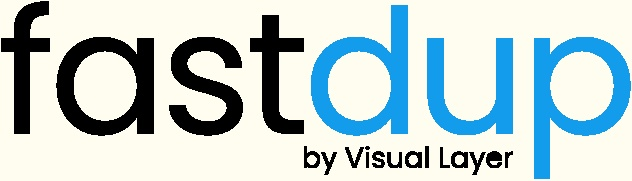
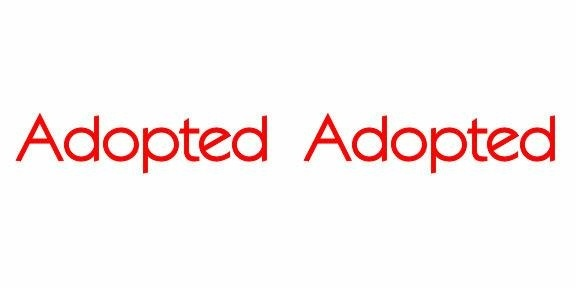
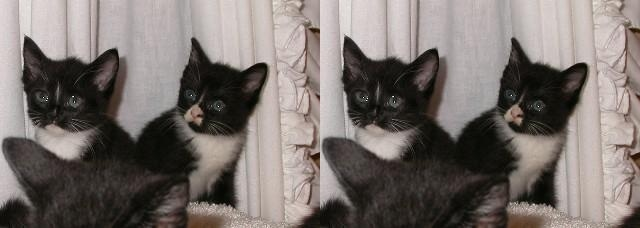
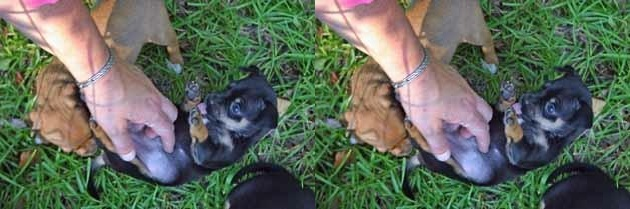
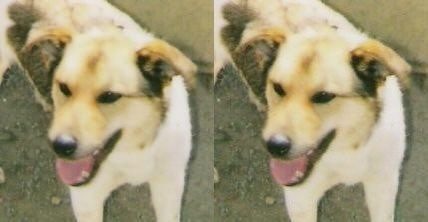
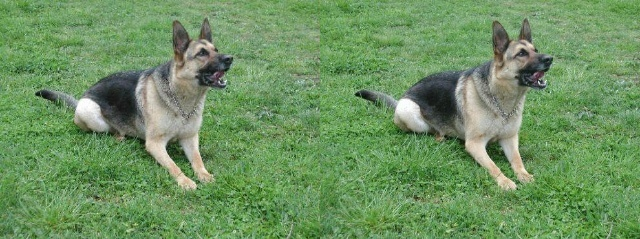
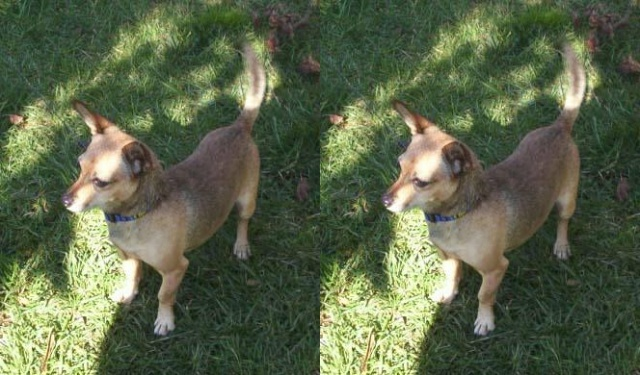
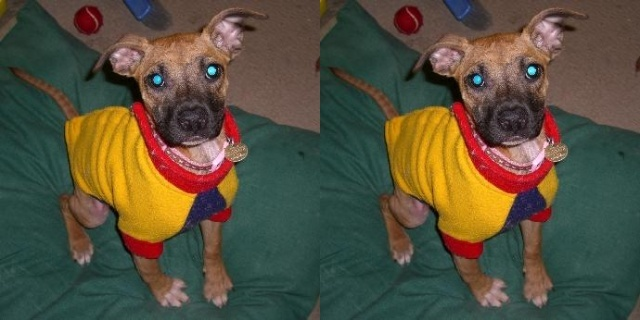
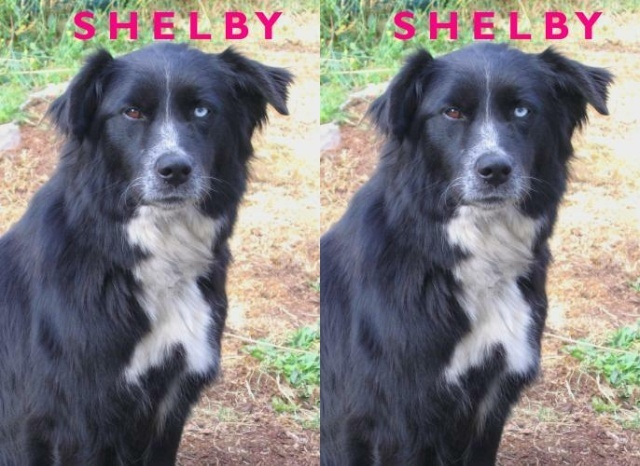
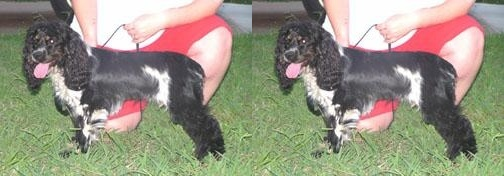
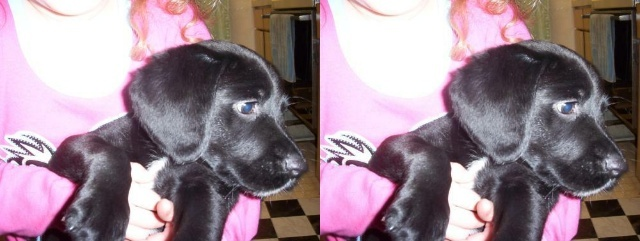
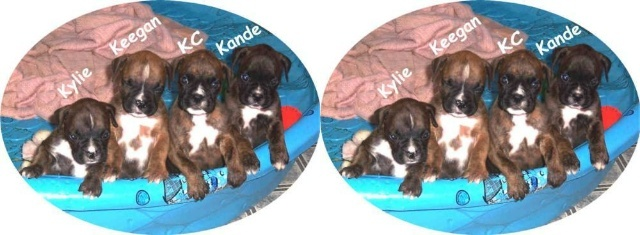
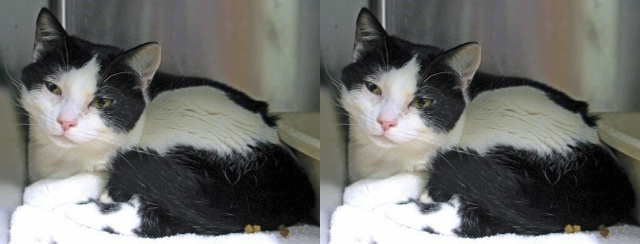
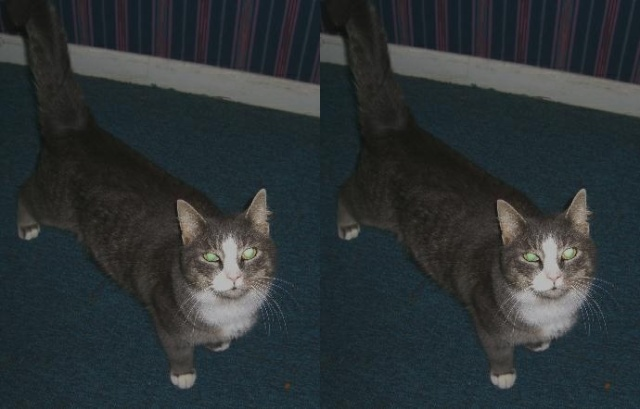
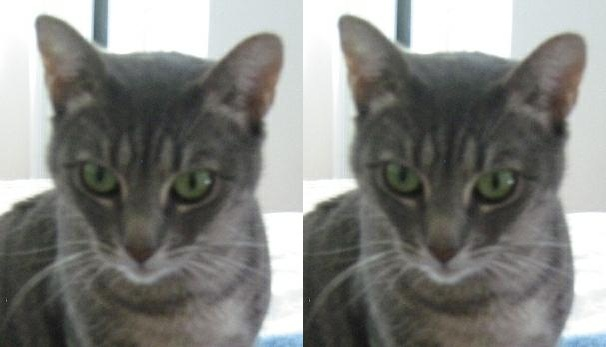
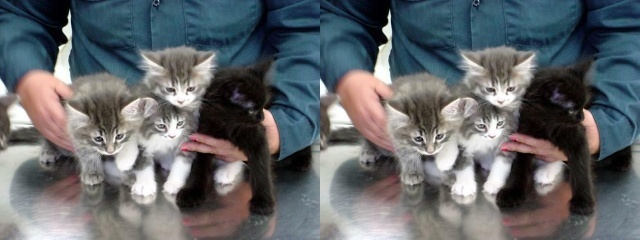
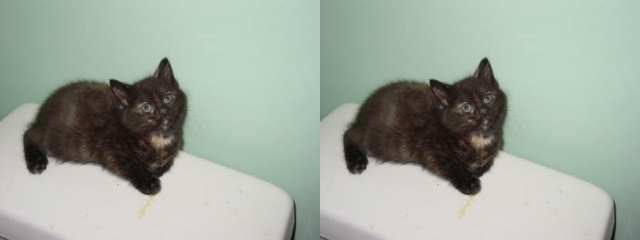
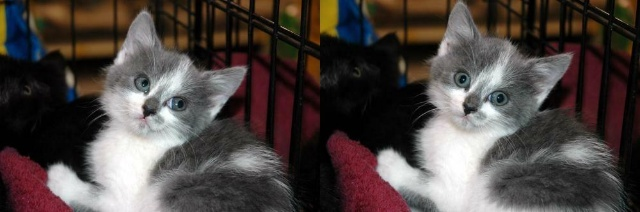
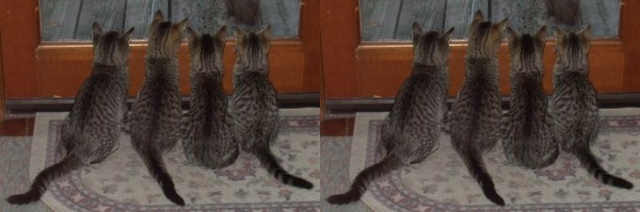
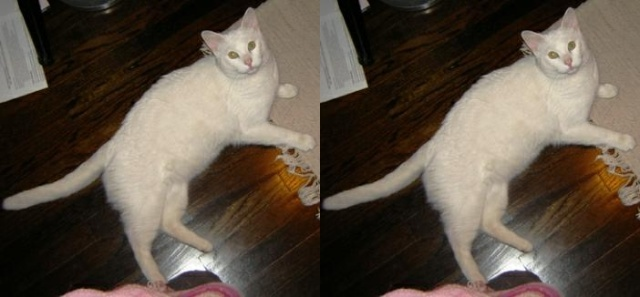
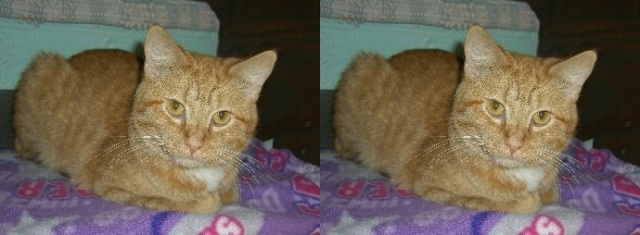

0

In [7]:
fd.vis.component_gallery()

View duplicates.

/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))
/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similarity visual view in  work_dir/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



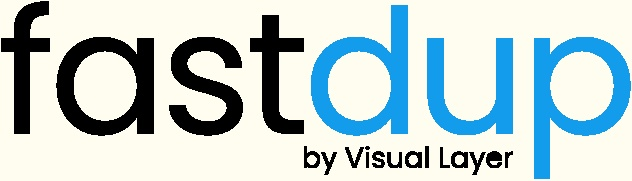
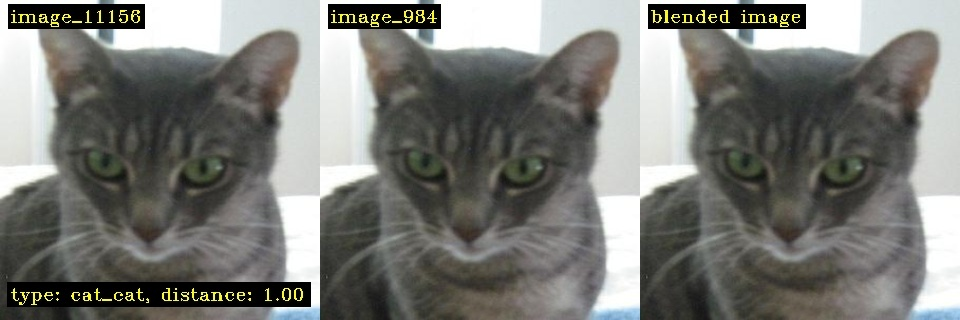
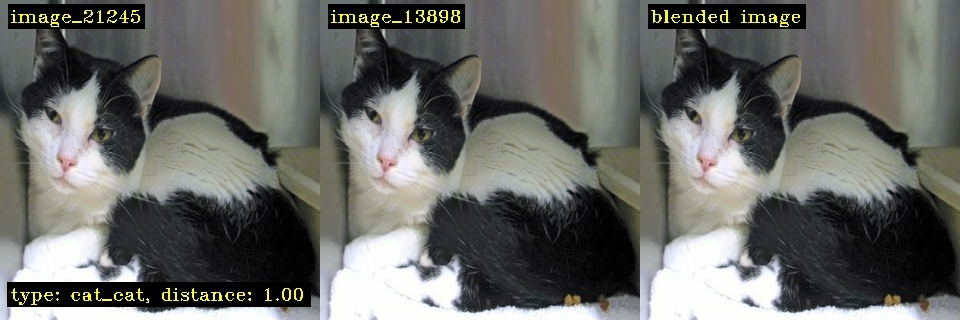
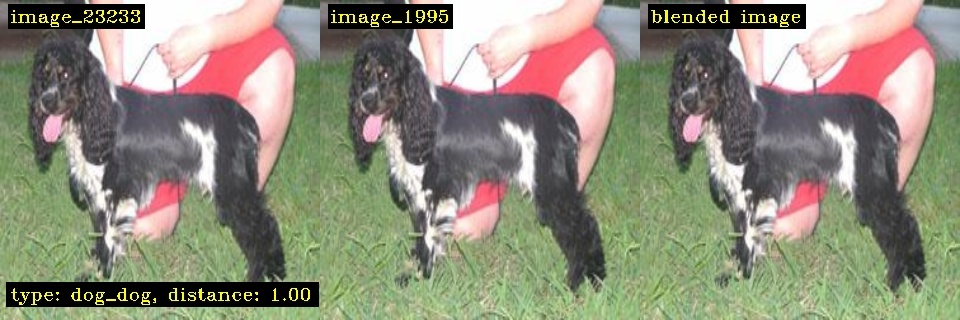
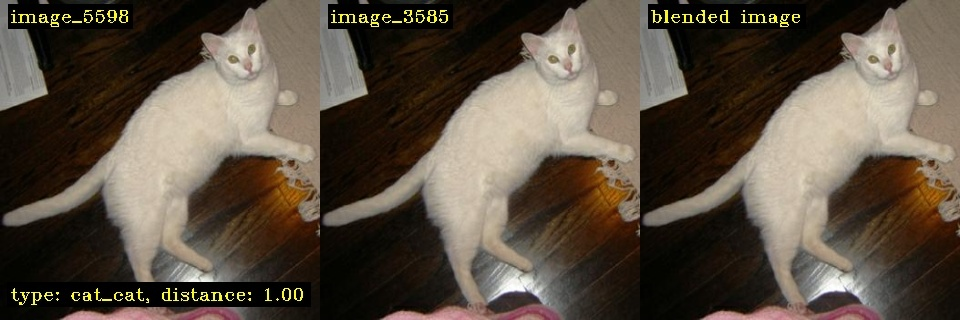
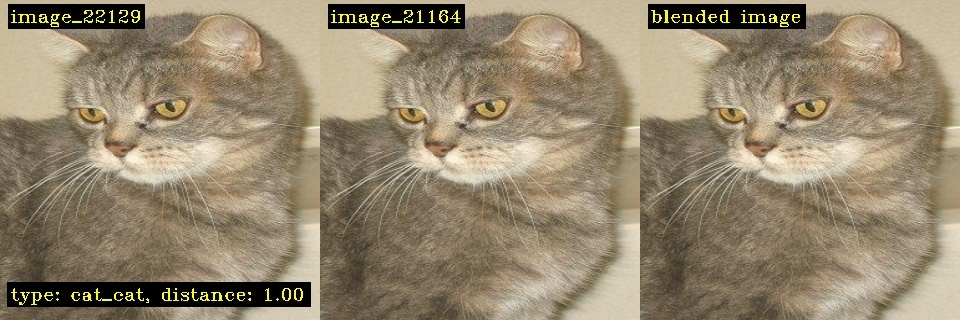
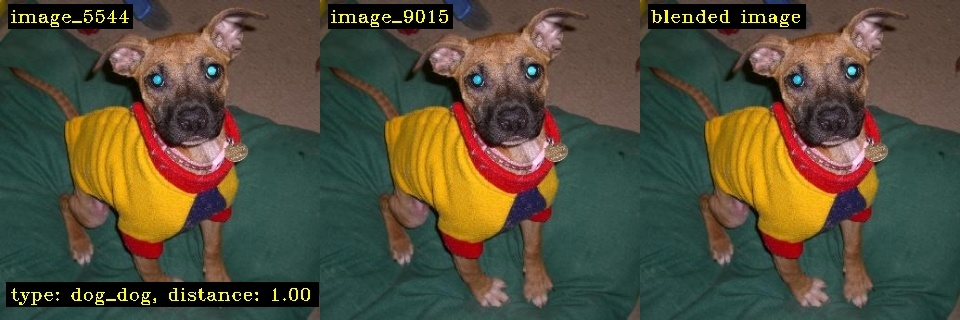
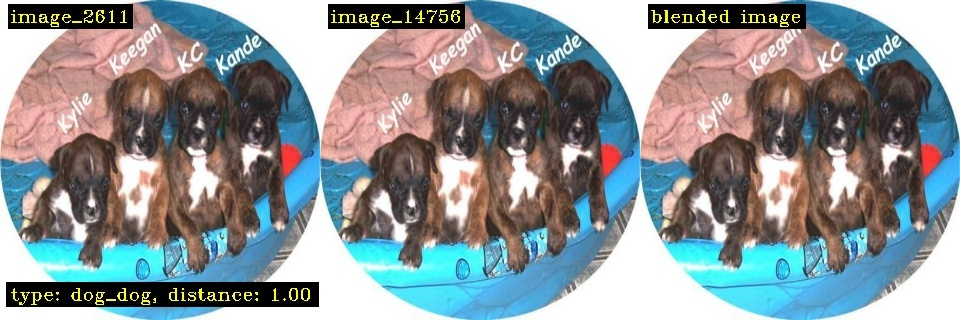
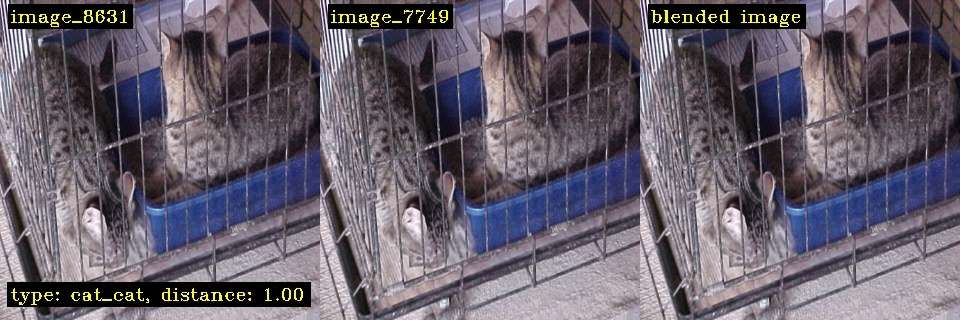
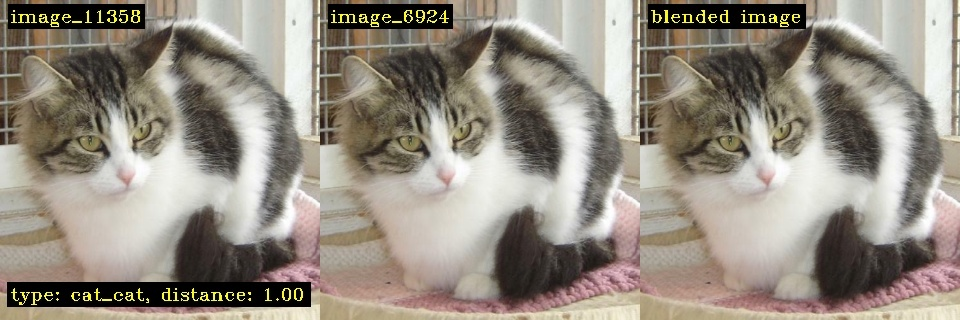
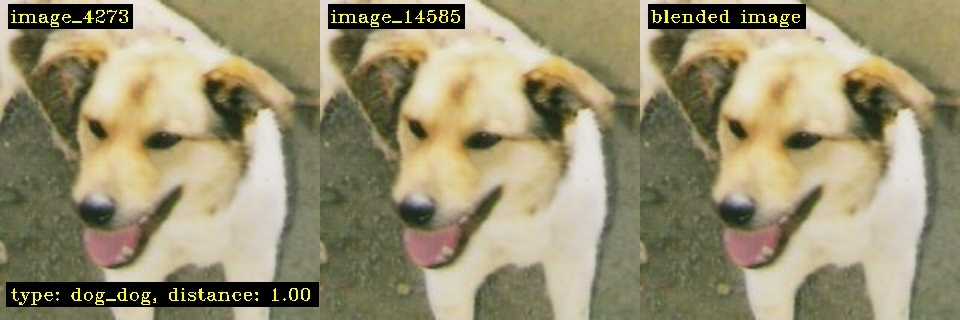
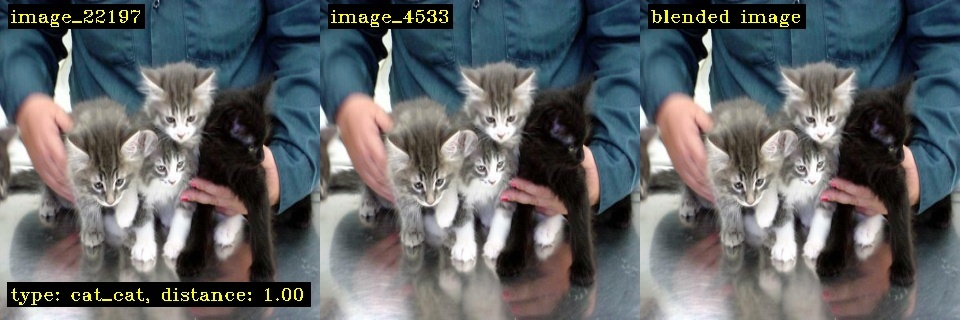
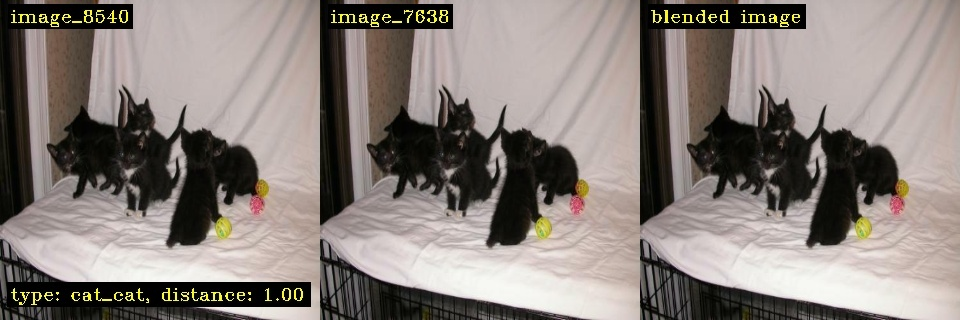
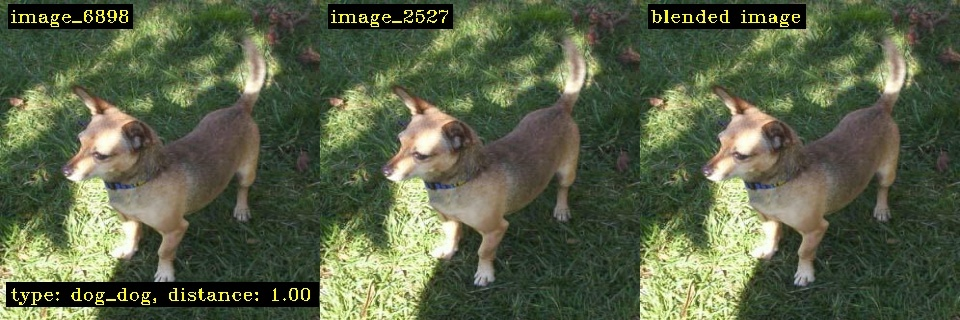

0

In [8]:
fd.vis.duplicates_gallery()

Let's also inspect the outliers.

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored outliers visual view in  work_dir/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



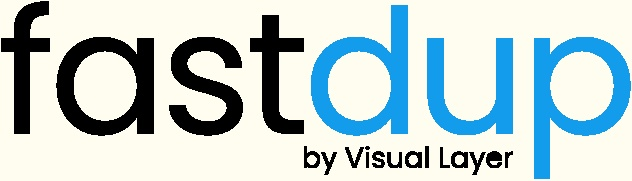
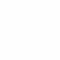
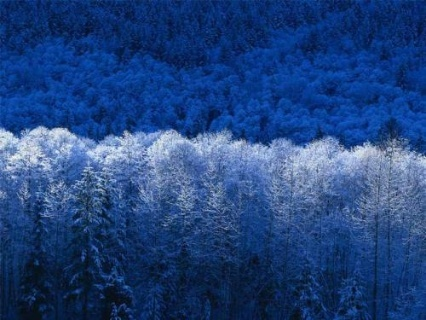
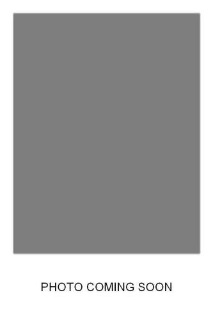
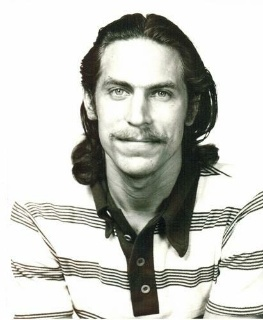
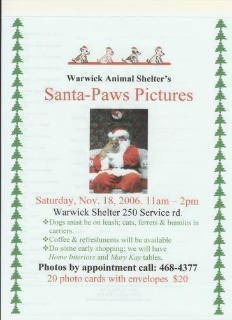
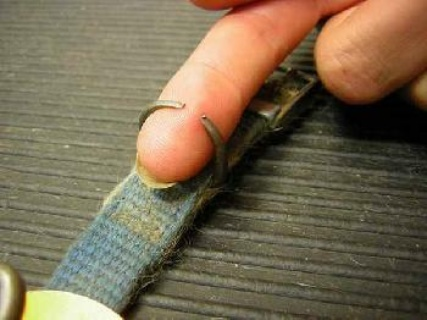
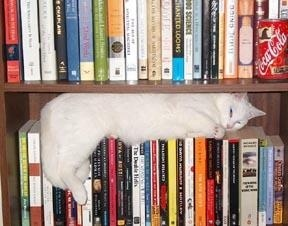
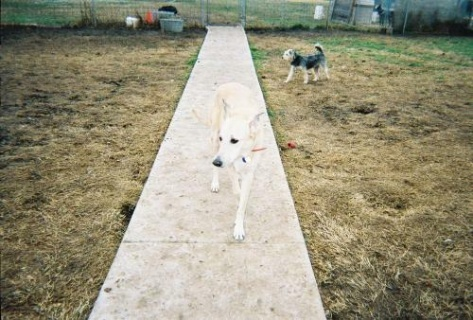
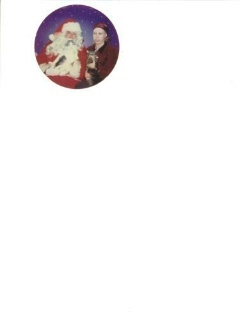
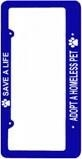
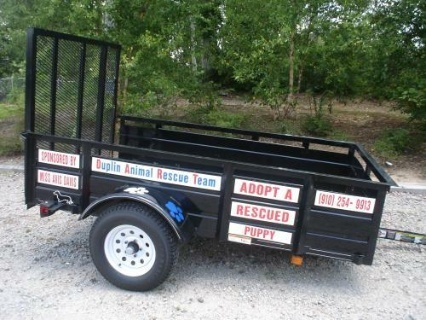
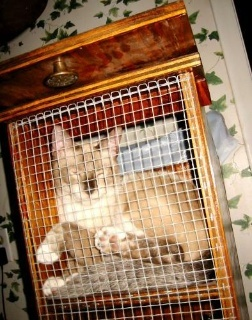
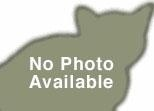
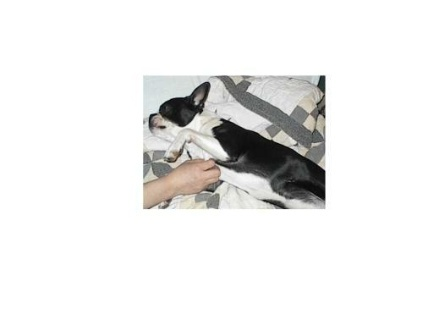
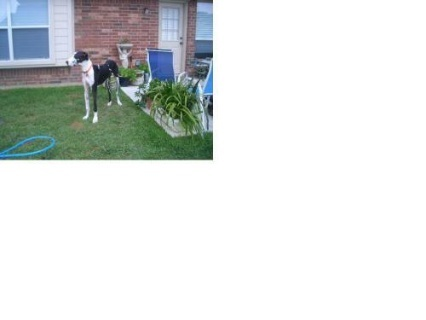
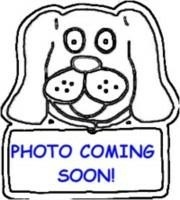
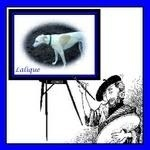
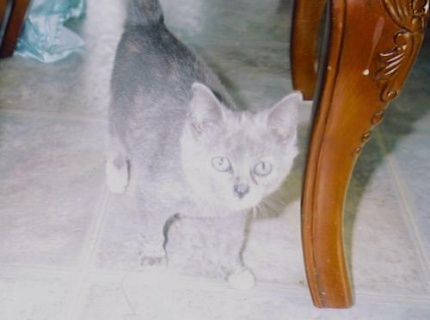
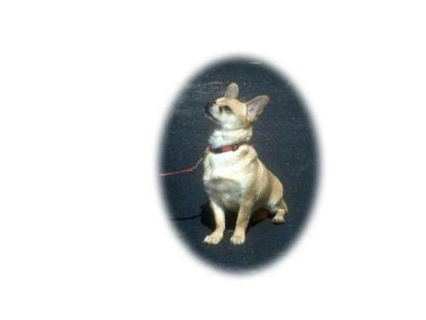
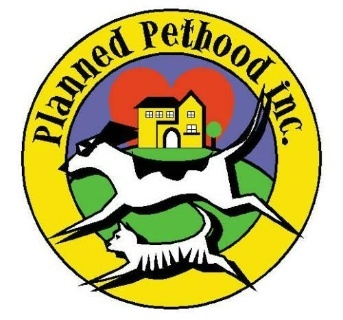

0

In [10]:
fd.vis.outliers_gallery()

## Wrap Up
In this tutorial, we showed how you can analyze datasets from Tensorflow Datasets using fastdup.

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try.


## VL Profiler - A faster and easier way to diagnose and visualize dataset issues

If you prefer a no-code platform to inspect and visualize your dataset, [**try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser. 

VL Profiler is free to get started. Upload up to 1,000,000 images for analysis at zero cost!

[Sign up](https://app.visual-layer.com) now.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/github_banner_profiler.gif)](https://app.visual-layer.com)

As usual, feedback is welcome! Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).

<center> 
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=200>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    </picture>
    </a><br>
    <a href="https://github.com/visual-layer/fastdup" target="_blank" style="text-decoration: none;"> GitHub </a> •
    <a href="https://visual-layer.slack.com/" target="_blank" style="text-decoration: none;"> Join Slack Community </a> •
    <a href="https://visual-layer.readme.io/discuss" target="_blank" style="text-decoration: none;"> Discussion Forum </a>
</center>

<center> 
    <a href="https://medium.com/visual-layer" target="_blank" style="text-decoration: none;"> Blog </a> •
    <a href="https://visual-layer.readme.io/" target="_blank" style="text-decoration: none;"> Documentation </a> •
    <a href="https://visual-layer.com/about" target="_blank" style="text-decoration: none;"> About Us </a> 
</center>

<center> 
    <a href="https://www.linkedin.com/company/visual-layer/" target="_blank" style="text-decoration: none;"> LinkedIn </a> •
    <a href="https://twitter.com/visual_layer" target="_blank" style="text-decoration: none;"> Twitter </a>
</center>